<a href="https://colab.research.google.com/github/John-p-v1999/basic_kmeans/blob/master/iris_with_kmans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer this video for better understanding
https://www.youtube.com/watch?v=vtuH4VRq1AU&t=1053s

In [2]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



Pandas is a library in python to load data as Dataframes. Dataframes are just like tables, thus they can be querried and general understanding of data can be made out



In [4]:
import pandas as pd
data=pd.read_csv('/content/gdrive/My Drive/Iris.csv')

Data.sample() is used to shuffle the rows in the dataframe. 

Setting frac=1, implies that all rows of dataframe should be retained. 

The '.rest_index()' resets the index when shuffled, otherwise index will be the values before shuffling. 'data.head()' is used to display the first5 columns in the dataframe.

In [5]:
data=data.sample(frac=1).reset_index(drop=True)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,74,6.1,2.8,4.7,1.2,Iris-versicolor
1,19,5.7,3.8,1.7,0.3,Iris-setosa
2,119,7.7,2.6,6.9,2.3,Iris-virginica
3,79,6.0,2.9,4.5,1.5,Iris-versicolor
4,77,6.8,2.8,4.8,1.4,Iris-versicolor


the '.unique()' is used to display the unique labels in the column. In the iris dataset there are three labels. They are:

'Iris-versicolor', 'Iris-setosa', 'Iris-virginica'

In [6]:
data['Species'].unique()

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica'], dtype=object)

The labels are in string format. That should be converted to integers for prediction purposes. For that the LabelEncoder package is used.

It converts
'Iris-versicolor' to 0

'Iris-setosa' to 1

Iris-virginica to 2


In [7]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
data["Species"] = lb_make.fit_transform(data["Species"])

In [8]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,74,6.1,2.8,4.7,1.2,1
1,19,5.7,3.8,1.7,0.3,0
2,119,7.7,2.6,6.9,2.3,2
3,79,6.0,2.9,4.5,1.5,1
4,77,6.8,2.8,4.8,1.4,1


In [ ]:
def euclidean_dist(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

The complete algorithm of K means is implemented as as Class

In [46]:
class KMeans:
  def __init__(self,K=3,max_iters=100,plot_steps=False):   
    self.K=K                                     # number of clusters(The 'K' value in K means)         
    self.max_iters=max_iters                     # maximum iterations that should be run for convergence of centroids
    self.plot_steps=plot_steps                   # optional, to plot intermediate outputs of centroids and clusters

    self.clusters = [[] for _ in range(self.K)]  # defining clusters as a list within a list of size K
    self.centroids=[]                            # the list where centroid values will be stored

  def predict(self,X,centroids):
    self.X=X                                     # storing the features of the dataset in a label. the size will be (150,4)
    self.n_samples, self.n_features= X.shape     #unsupervised to get number of samples and feature size
    #initialising the centroid

    self.centroids=centroids                     # the centroid value is initialised
    for _ in range(self.max_iters):              # running for max_iters
      self.clusters=self._create_clusters()      # function to create the clusters with current centroid values
      if self.plot_steps:                        # to plot the cluster
        self.plot()
      centroids_old=self.centroids               # the current centroids are stored in a new variable to check for convergence later
      self.centroids=self._get_centroids()       # Calculating the new centroids with the updated clusters
      if self.plot_steps:                        # plotting again
        self.plot()
      if self._is_converged(centroids_old):      # checking for convergence. If old centroid value is same as new centroid, the it is converged. Therefore break from loop
        break
    return self._get_cluster_labels(),self.centroids  # return the labels for each row and the centroid values



  def _create_clusters(self):
    clusters= [[] for _ in range(self.K)]
    for idx,sample in enumerate(self.X):
      closest_centroid=self._closest_centroid(sample) # finding the closest centroid to a point.
      clusters[closest_centroid].append(idx)          # the index of the point are stored in the corresponding cluster it belongs to.(Note: as labels are 0,1,2- they can also be the indices of array)
    return clusters
  def _closest_centroid(self,sample):
    dist=[euclidean_dist(sample,point) for point in self.centroids] # distances from each centroids are calculated
    return np.argmin(dist)                                          # np.argmin returns the index of the minimum value. in our case it returns the centroid closest to the point 
  def _get_centroids(self):                                         
    centroid=np.zeros((self.K, self.n_features))
    for idx,ele in enumerate(self.clusters):
      cluster_mean=np.mean(self.X[ele], axis=0)           #mean of each cluster is calculated. this will be the new centroid
      centroid[idx]=cluster_mean                          # the mean is assigned to corresponding to centroid
    return centroid

  def _is_converged(self,centroids_old):
    distance=[euclidean_dist(centroids_old[i],self.centroids[i]) for i in range(self.K)] # checking the convergence. If converged, the distance will be 0
    return sum(distance) == 0
  def _get_cluster_labels(self):
    labels=np.empty(self.n_samples)
    for idx,cluster in enumerate(self.clusters):
      for s_idx in cluster:
        labels[s_idx] = idx                       #labels is a list of size samples(150 in this case). for each sample, corresponding label,whether0,1 or 2 is calculated
    return labels
  def plot(self):
    fig = plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111,projection='3d')
    for i, index in enumerate(self.clusters):
      point=self.X[index].T
      ax.scatter(*point )
    for point in self.centroids:
      ax.scatter(*point, marker="x",c="black",linewidth=2)   # the centroids are marked as 'x'
    plt.show()

In [44]:
import math
def dist(X1,X2):
  return ((X1[0]-X2[0])**2)+((X1[1]-X2[1])**2)+((X1[2]-X2[2])**2)+((X1[3]-X2[3])**2)


In [45]:
x=data.iloc[:,1:-1].values   # this takes the columns 1 to second last( last column is not taken) and they are converted to numpy array
y=data.iloc[:,-1].values     # the last column is taken and converted to numpy array

sicd : sum of inter cluster distance.
It is sum of square of distance of each points from their respective centroids

In [47]:

clusters = len(np.unique(y))
k=KMeans(K=clusters, max_iters=150, plot_steps=False)
samples,features=x.shape
sicd=[]
for i in range(samples-3):
  y_pred,centroid=k.predict(x,x[i:i+3])
  
  sicd_sum=0
  for j in range(samples):
    if y_pred[j]==0:
      sicd_sum+=dist(x[j],centroid[0])
    elif y_pred[j]==1:
      sicd_sum+=dist(x[j],centroid[1])
    else:
      sicd_sum+=dist(x[j],centroid[2])
  sicd.append(sicd_sum)
  sicd_sum=0


In [48]:
print(sicd)

[78.94084142614601, 78.94084142614601, 78.94084142614601, 78.9450658259773, 78.9450658259773, 78.9450658259773, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.9450658259773, 142.8592916666665, 78.9450658259773, 78.9450658259773, 142.8592916666665, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.9450658259773, 78.94084142614601, 142.8592916666665, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 145.27932203646046, 142.8592916666665, 78.9450658259773, 143.4537354840621, 143.4537354840621, 145.27932203646046, 145.27932203646046, 78.9450658259773, 78.9450658259773, 145.27932203646046, 143.4537354840621, 143.4537354840621, 78.9450658259773, 78.94084142614601, 78.9450658259773, 143.4537354840621, 143.4537354840621, 78.9450658259773, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 78.94084142614601, 7

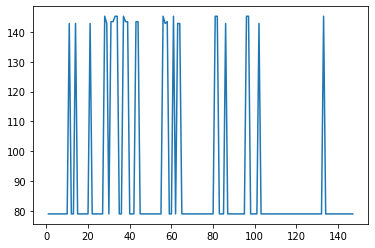

In [49]:
n=np.arange(1,samples-2,1)
plt.plot(n,sicd)

From the figure above taking first three samples as initial centroids gives least sicd value

In [37]:
def euclidean_dist(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

The class is defined again. It is the same as before. Only difference being centroids are initially hardcoded as first 3 samples 

In [38]:
class KMeans:
  def __init__(self,K=3,max_iters=100,plot_steps=False):
    self.K=K
    self.max_iters=max_iters
    self.plot_steps=plot_steps

    self.clusters = [[] for _ in range(self.K)]
    self.centroids=[]

  def predict(self,X):
    self.X=X
    self.n_samples, self.n_features= X.shape #unsupervised
    #initialising the centroid
    self.centroids=[self.X[index] for index in range(3)] 
    for _ in range(self.max_iters):
      self.clusters=self._create_clusters()
      if self.plot_steps:
        self.plot()
      centroids_old=self.centroids # to check for convergence later
      self.centroids=self._get_centroids()
      if self.plot_steps:
        self.plot()
      if self._is_converged(centroids_old):
        break
    return self._get_cluster_labels()



  def _create_clusters(self):
    clusters= [[] for _ in range(self.K)]
    for idx,sample in enumerate(self.X):
      closest_centroid=self._closest_centroid(sample)
      clusters[closest_centroid].append(idx)
    return clusters
  def _closest_centroid(self,sample):
    dist=[euclidean_dist(sample,point) for point in self.centroids]
    return np.argmin(dist)
  def _get_centroids(self):
    centroid=np.zeros((self.K, self.n_features))
    for idx,ele in enumerate(self.clusters):
      cluster_mean=np.mean(self.X[ele], axis=0)
      centroid[idx]=cluster_mean
    return centroid

  def _is_converged(self,centroids_old):
    distance=[euclidean_dist(centroids_old[i],self.centroids[i]) for i in range(self.K)]
    return sum(distance) == 0
  def _get_cluster_labels(self):
    labels=np.empty(self.n_samples)
    for idx,cluster in enumerate(self.clusters):
      for s_idx in cluster:
        labels[s_idx] = idx
    return labels
  def plot(self):
    fig = plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111,projection='3d')
    for i, index in enumerate(self.clusters):
      point=self.X[index].T
      ax.scatter(*point )
    for point in self.centroids:
      ax.scatter(*point, marker="x",c="black",linewidth=2)
    plt.show()

for plotting simplicity, only first three features are taken for prediction

In [40]:
x=data.iloc[:,1:4].values
y=data.iloc[:,-1].values

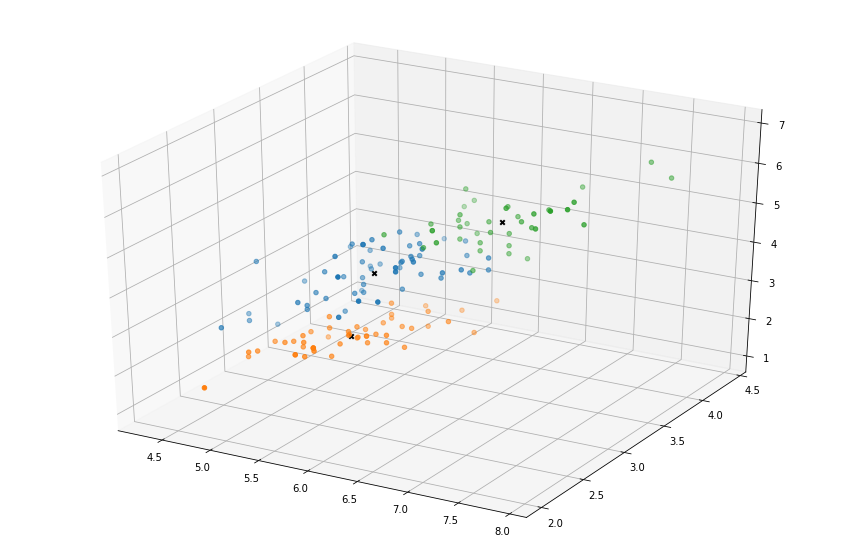

In [41]:
from mpl_toolkits.mplot3d import Axes3D
clusters = len(np.unique(y))
k=KMeans(K=clusters, max_iters=150, plot_steps=False)
y_pred=k.predict(x)
k.plot()

The above figure is the predicted scatter plot

In [42]:
x=data.iloc[:,1:4].values
print(y[:5])
print(x.T)

[1 0 2 1 1]
[[6.1 5.7 7.7 6.  6.8 5.4 5.6 6.9 6.2 5.8 6.5 4.8 5.5 4.9 5.1 6.3 6.5 5.6
  5.7 6.4 4.7 6.1 5.  6.4 7.9 6.7 6.7 6.8 4.8 4.8 4.6 5.7 6.7 4.8 4.4 6.3
  6.4 5.2 5.  5.2 5.8 6.  6.7 5.4 5.4 5.5 6.3 6.4 6.6 7.2 5.7 7.6 5.6 5.1
  7.7 5.8 5.2 5.  5.1 5.  6.3 4.8 5.  5.1 5.6 5.1 5.7 7.7 4.6 6.2 5.7 5.5
  6.  5.8 6.  5.4 6.2 5.5 5.4 5.  6.4 5.  5.  5.5 6.7 4.9 5.8 5.  5.  5.9
  5.1 6.9 6.  6.1 7.7 5.5 4.4 4.3 6.  7.2 4.6 5.1 4.4 6.3 6.3 4.6 6.8 6.3
  4.7 6.1 6.5 6.2 7.  6.4 5.1 6.9 5.9 6.5 5.7 5.2 6.1 4.5 6.6 5.5 5.3 5.6
  7.3 6.7 5.1 4.9 6.7 7.2 4.9 6.7 4.9 6.9 7.4 6.3 5.7 6.5 6.3 6.4 5.6 5.9
  5.4 6.1 4.9 5.8 5.8 7.1]
 [2.8 3.8 2.6 2.9 2.8 3.4 2.9 3.1 2.2 2.7 3.2 3.  3.5 3.1 3.8 3.3 3.  2.5
  2.8 2.8 3.2 3.  3.4 2.8 3.8 3.  2.5 3.2 3.  3.1 3.6 4.4 3.1 3.4 3.2 2.5
  3.2 3.5 3.6 4.1 2.7 3.4 3.1 3.9 3.7 2.4 2.8 3.1 3.  3.6 2.9 3.  3.  3.5
  2.8 2.7 3.4 3.5 3.8 2.  2.7 3.4 3.  3.3 2.7 3.4 3.  3.8 3.2 2.9 2.5 4.2
  3.  2.7 2.2 3.  3.4 2.3 3.9 2.3 2.7 3.3 3.2 2.4 3.  3.1 2.8 3.4 3.5 3.2

The original plot is given below

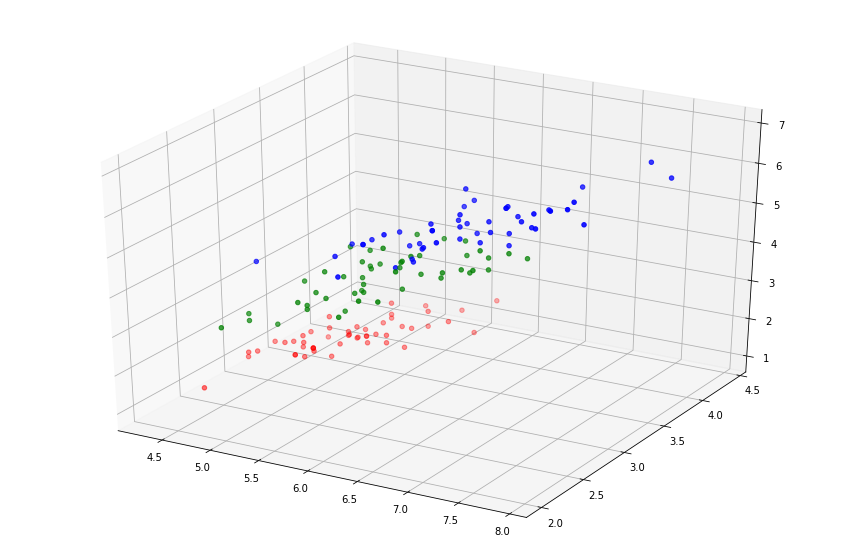

In [43]:
import matplotlib
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
colors = ['red','green','blue']
ax.scatter(*x.T,c=y,cmap=matplotlib.colors.ListedColormap(colors))